# VGG-16 (CNN) Implementation

In [7]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.models import Sequential

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import scipy

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

Specifying the path to the dataset

In [3]:
dataset_path = "E:/Images_for_models_v2/Images"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

 Read the images from a big numpy array and folders. This method also allows you to automatically label the images based on the directory structure:

In [4]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    dataset_path, # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 18440 images belonging to 15 classes.
Found 4603 images belonging to 15 classes.


Displaying some of the Images from the dataset

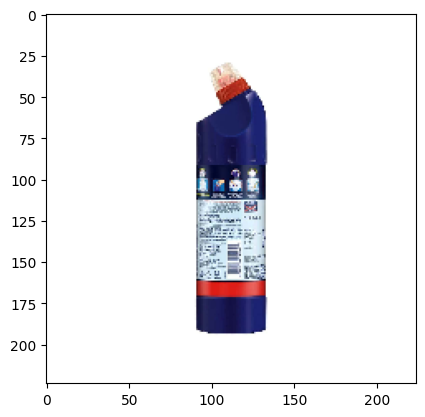

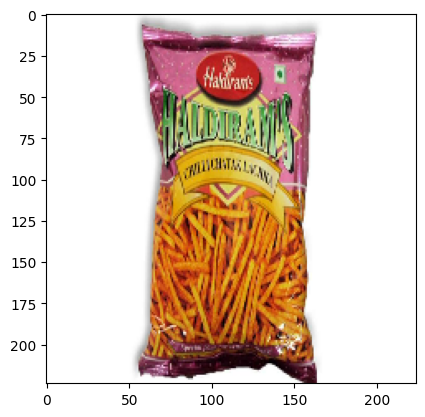

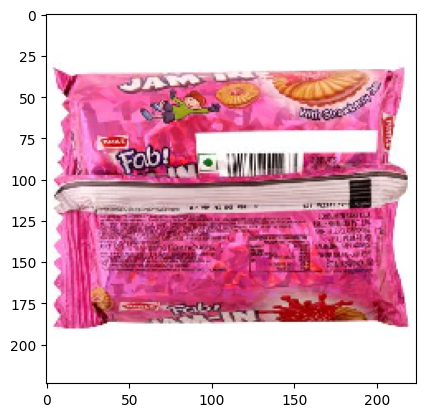

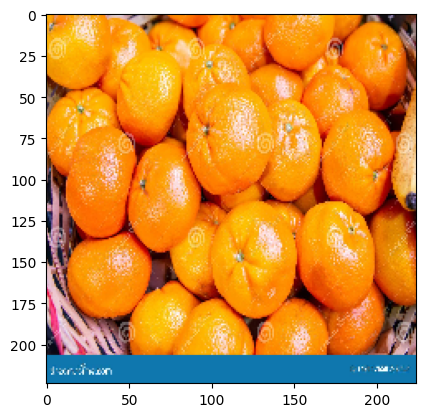

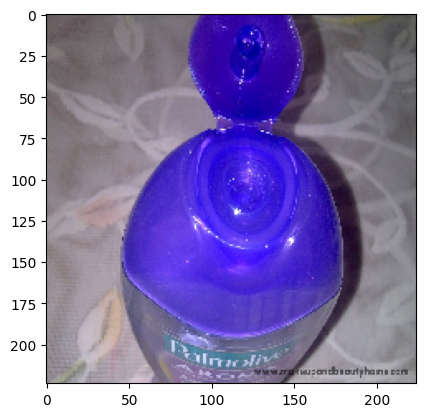

In [5]:
# Accessing and displaying a batch of the training images
X_batch, y_batch = next(train_generator)
for i in range (0,5):
    image = X_batch[i]
    plt.imshow(image)
    plt.show()



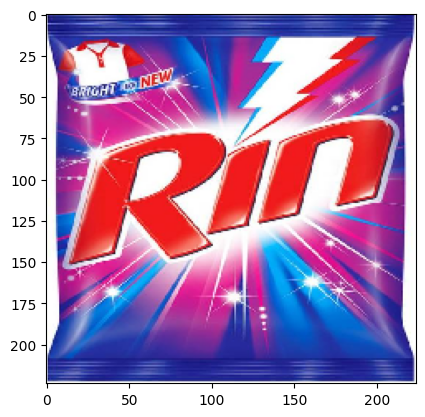

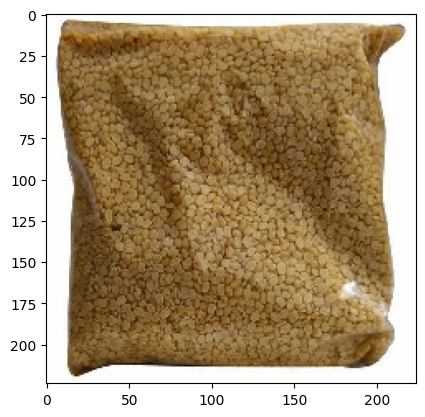

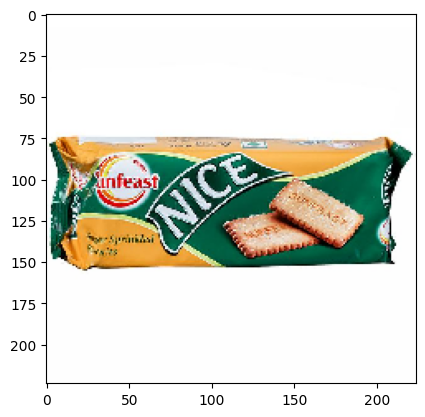

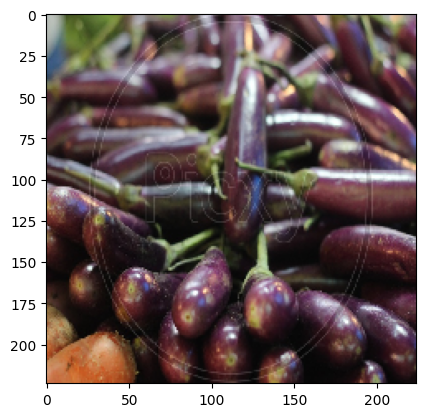

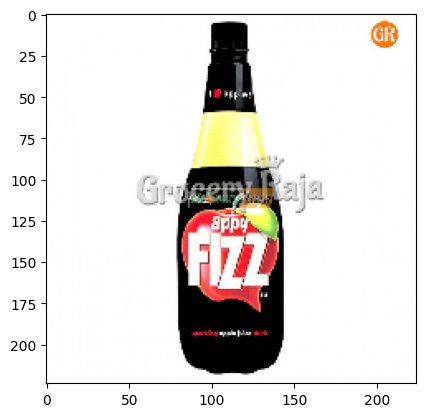

In [6]:
# Accessing and displaying a batch of the validation images
X_batch, y_batch = next(validation_generator)
for i in range (0,5):
    image = X_batch[i]
    plt.imshow(image)
    plt.show()

For fitting the model : 

In [8]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [9]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



58889256/58889256 [==============================] - 129s 2us/step


Making the layers (weights) of the model non trainable (keep the original weights)

In [10]:
for layer in vgg.layers:
  layer.trainable = False

Forging the model

In [13]:
x = Flatten()(vgg.output)
num_classes = 15

prediction = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0    

Fitting the model

In [14]:
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 50)

C:\Users\gener\AppData\Local\Temp\ipykernel_25488\532854700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50




c:\Users\gener\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


244/576 [===========>..................] - ETA: 18:12 - loss: 1.6467 - accuracy: 0.5122

KeyboardInterrupt: 